User input ended
User sample with (width, height): (30, 25) classified as Pichu
Sample with (width, height): (25, 35) classified as Pikachu
Sample with (width, height): (15, 14) classified as Pichu
Sample with (width, height): (26, 30) classified as Pichu
Sample with (width, height): (22, 45) classified as Pikachu


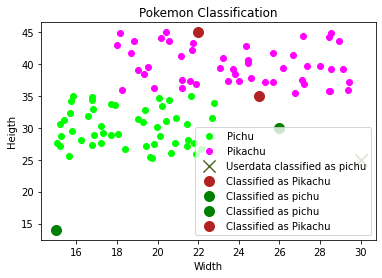

In [12]:
from matplotlib import colors
import matplotlib.pyplot as plt
import math

def remove_clutter(data:str, x_list:list, y_list:list) -> None: # Removes clutter from our txt files, we only want the numbers
        temp_coor = []
        temp = ""  

        for line in data: 
            temp = line
            temp = temp.replace("(","")
            temp = temp.replace(")","") # Removes every "clutter" char with nothing
            temp = temp.replace(",","")
            temp_coor = temp.split() # Split the de-cluttered string into 2 string, one x, one y
            x_list.append(float(temp_coor[0])) # turn the string into a float var and add it into the corresponding list of x/y variables
            y_list.append(float(temp_coor[1]))

def classify_five_points(data_points:int, x_points:list, y_points:list, is_userdata:bool = False, pichu_color:str = "green", pika_color:str = "firebrick"): 
        '''Classifies data by looking for the 5 closest points compared to our given data'''

        for j in range(data_points): # goes through every data point given
            distances_pichu = []
            distances_pikachu = []
            for i in range(50):
                distances_pichu.append(math.sqrt((pichu_x[i] - x_points[j])**2 + (pichu_y[i] - y_points[j])**2)) # Makes a list of the distance between the test point and every given pichu data
            for i in range(50):
                distances_pikachu.append(math.sqrt((pikachu_x[i] - x_points[j])**2 + (pikachu_y[i] - y_points[j])**2)) # the same but for the pikachu data

            avrg_pichu = 0
            avrg_pikachu = 0
            distances_pichu.sort() # sorts the pichu and pikachu data to have the smallest distances in the start of the list
            distances_pikachu.sort()

            avrg_pichu = sum(distances_pichu[0:5]) / len(distances_pichu[0:5]) # calculates the avarage of the 5 smallest distances between our data point and our pichu points
            avrg_pikachu = sum(distances_pikachu[0:5]) / len(distances_pikachu[0:5]) # the same but for the pikachu data

            if avrg_pichu < avrg_pikachu: # if the avarage between the 5 points is smaller for pichu, the data is classified as pichu and is then plotted
                
                if is_userdata == False:
                    print(f"Sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pichu")
                    plt.scatter(x_points[j],y_points[j], c="green", s=100, label="Classified as pichu")
                if is_userdata == True:
                    print(f"User sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pichu")
                    plt.scatter(x_points[j],y_points[j], c="darkolivegreen", s=150, marker="x", label="Userdata classified as pichu")
            else:                       # if the avarage between the 5 points instead is smaller for pikachu, the data is classified as pikachu and is then plotted
                
                if is_userdata == False:
                    print(f"Sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pikachu")
                    plt.scatter(x_points[j],y_points[j], c="firebrick", s=100, label ="Classified as Pikachu")
                if is_userdata == True:
                    print(f"User sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pikachu")
                    plt.scatter(x_points[j],y_points[j], c="maroon", s=150, marker="x", label ="Userdata classified as Pikachu")


def classify_closest_point(data_points:int, x_points:list, y_points:list ,is_userdata:bool = False, pichu_color:str = "green", pika_color:str = "firebrick"):
        '''Classifies data by looking for the closest point compared to our given data'''     
        for j in range(data_points):
            distances_pichu = []
            distances_pikachu = []
            for i in range(50):
                distances_pichu.append(math.sqrt((pichu_x[i] - x_points[j])**2 + (pichu_y[i] - y_points[j])**2))
            for i in range(50):
                distances_pikachu.append(math.sqrt((pikachu_x[i] - x_points[j])**2 + (pikachu_y[i] - y_points[j])**2))

            distances_pichu.sort()
            distances_pikachu.sort()

            if distances_pichu[0] < distances_pikachu[0]:
                print(f"Sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pichu")
                plt.scatter(x_points[j],y_points[j], c=pichu_color, s=100, label="Classified as pichu")
            else:
                print(f"Sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pikachu")
                plt.scatter(x_points[j],y_points[j], c=pika_color, s=100, label="Classified as Pikachu")

def get_userdata(): # Let's the user input data and approprietly handles errors or incorrect inputs
        user_data = []
        while True:
            answ = input("Do you want to input a datapoint? (y/n): ")
            try:
                answ = str(answ)
                if answ.upper() == "Y":
                    user_data = input("Please input coordinates: (x y) 0 < x,y < 100: ").split()
                    if len(user_data) == 2:
                        while True:
                            if 0 > float(user_data[0]) > 100  or  0 > float(user_data[1]) > 100:
                                print("Please input a number thats larger than 0 and smaller than 100")
                                break
                            else:
                                try:
                                    user_x.append(float(user_data[0]))
                                    user_y.append(float(user_data[1]))
                                    break
                                except TypeError:
                                    print("Please input a 2d coordinate (consisting of numbers)")
                    else:
                        print("Please input a 2d coordinate")
                elif answ.upper() == "N":
                    print("User input ended")
                    break
            except TypeError as err:
                print(err)

with open("../Labs/ClassifyPokemon/files/pichu.txt", "r") as f_pichu, open("../Labs/ClassifyPokemon/files/pikachu.txt", "r") as f_pikachu, open("../Labs/ClassifyPokemon/files/test_points.txt", "r") as f_testpoints:

    pichu_data = f_pichu.readlines()
    pikachu_data = f_pikachu.readlines() # read every data file
    test_points = f_testpoints.readlines()
    pichu_data.pop(0) # remove the "(width (cm), height (cm))"" line in pichu and pikachu data
    pikachu_data.pop(0)

    pikachu_x = []
    pikachu_y = []
    pichu_x = [] # lists to store every x and y point for our data files and user input
    pichu_y = []
    test_points_x = []
    test_points_y = []
    user_x = []
    user_y = []
    
    
    remove_clutter(pichu_data, pichu_x, pichu_y)
    remove_clutter(pikachu_data, pikachu_x, pikachu_y) # removes clutter from all our datafiles and stores them in appropriate lists
    remove_clutter(test_points, test_points_x, test_points_y)

    plt.scatter(pichu_x, pichu_y, c="lime", label = "Pichu") # plot all original pichu and pikachu data
    plt.scatter(pikachu_x, pikachu_y, c="magenta", label = "Pikachu")

    classified_pichu =  []
    classified_pikachu = []
        
    get_userdata()
    classify_five_points(len(user_x),user_x, user_y, True) # This setup let's the user input values as many times as they want and every input will plot approprietly
    classify_five_points(len(test_points_x), test_points_x, test_points_y)

    plt.legend()
    #plt.axis(ymax=50,xmax=50)
    plt.title('Pokemon Classification')
    plt.xlabel("Width")
    plt.ylabel("Heigth")
    plt.show()


